In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('clustered_data.csv')
df.head()

,age,daily_steps,sleep_hours,resting_heart_rate,daily_calorie_balance,gender_Male,cluster
0,56,5872,10.0,60.2,361.2,False,0
1,69,3365,3.0,75.2,96.9,True,2
2,46,7440,7.3,68.5,107.6,False,0
3,32,3631,10.0,72.5,-461.6,True,1
4,60,9292,4.4,77.1,-146.9,False,0


In [52]:
X=df.iloc[:,:-1]
y = df['cluster']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred = clf.predict(X_test_scaled)

In [61]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       254
           2       1.00      1.00      1.00       250

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
 [[496   0   0]
 [  0 254   0]
 [  0   0 250]]


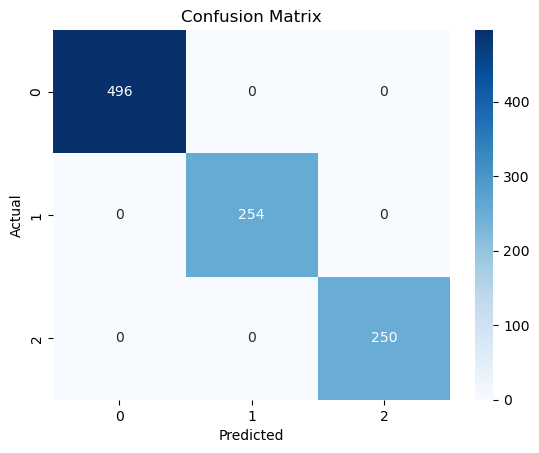

In [64]:
#Heatmap of Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [66]:
label_map = {0: 'Fit', 1: 'Average', 2: 'Needs Improvement'}
predicted_labels = [label_map[i] for i in y_pred]

In [68]:
predicted_labels

['Fit',
 'Needs Improvement',
 'Average',
 'Needs Improvement',
 'Fit',
 'Fit',
 'Fit',
 'Fit',
 'Average',
 'Average',
 'Fit',
 'Fit',
 'Average',
 'Fit',
 'Fit',
 'Fit',
 'Fit',
 'Fit',
 'Average',
 'Fit',
 'Fit',
 'Needs Improvement',
 'Average',
 'Fit',
 'Average',
 'Fit',
 'Average',
 'Fit',
 'Average',
 'Average',
 'Average',
 'Fit',
 'Needs Improvement',
 'Fit',
 'Fit',
 'Fit',
 'Fit',
 'Fit',
 'Needs Improvement',
 'Average',
 'Fit',
 'Needs Improvement',
 'Average',
 'Fit',
 'Average',
 'Fit',
 'Fit',
 'Average',
 'Average',
 'Average',
 'Fit',
 'Fit',
 'Fit',
 'Needs Improvement',
 'Average',
 'Needs Improvement',
 'Fit',
 'Fit',
 'Fit',
 'Average',
 'Fit',
 'Needs Improvement',
 'Fit',
 'Average',
 'Average',
 'Needs Improvement',
 'Fit',
 'Average',
 'Needs Improvement',
 'Fit',
 'Fit',
 'Needs Improvement',
 'Fit',
 'Fit',
 'Needs Improvement',
 'Fit',
 'Fit',
 'Average',
 'Fit',
 'Needs Improvement',
 'Fit',
 'Average',
 'Average',
 'Fit',
 'Fit',
 'Average',
 'Fit',
 'Fi

In [74]:
recommendations = {
    'Fit': "Great job! Your current health and activity data indicate a high fitness level.\n Continue maintaining a balanced lifestyle...\n(see full Fit text above)",
    'Average': "You're doing okay, but there's room for improvement...\n(see full Average text above)",
    'Needs Improvement': "Your health indicators suggest that some lifestyle changes are needed...\n(see full Needs Improvement text above)"
}

In [76]:
predicted_label = label_map[y_pred[0]]  
print(recommendations[predicted_label])

Great job! Your current health and activity data indicate a high fitness level.
 Continue maintaining a balanced lifestyle...
(see full Fit text above)


In [80]:
import joblib
joblib.dump(clf, 'fitness_classifier.pkl')

['fitness_classifier.pkl']

In [82]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']